# Задачи: Оптимизация, градиенттік түсу, шығын функциялары, регуляризация, Ньютон әдісі

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## 🟢 Уровень 1 — Базовые (понимание)


### Задача 1. Туынды
Дана функция:
f(x)=3x^2−5x+1

In [2]:
def f(x):
    return 3*(x**2) - 5*x+1 


def df(x):
    return 6*x - 5

x = 2

print(f"f(x) = {f(x)}")
print(f"df(x) = {df(x)}")

f(x) = 3
df(x) = 7


### Задача 2. Частные производные
Дана функция:
f(x,y)=x^2+4y


In [3]:
def grad_f(x,y):
    df_dx = 2*x
    df_dy = 4 
    return np.array([df_dx, df_dy])

grad_f(1, -1)

array([2, 4])

### Задача 3. Интерпретация градиента

<img src="gradient-descent.png" width="800">

<img src="convexity.png" width="800">

## 🟡 Уровень 2 — Градиенттік түсу

### Задача 4. Градиентный спуск (1D)
Дана функция:
J(θ)=(θ−5)^2

Требуется:

Найти градиент

Реализовать градиентный спуск

Показать сходимость за 20 итераций при η=0.


C:\Users\jekim\AppData\Local\Temp\ipykernel_14484\1647614543.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


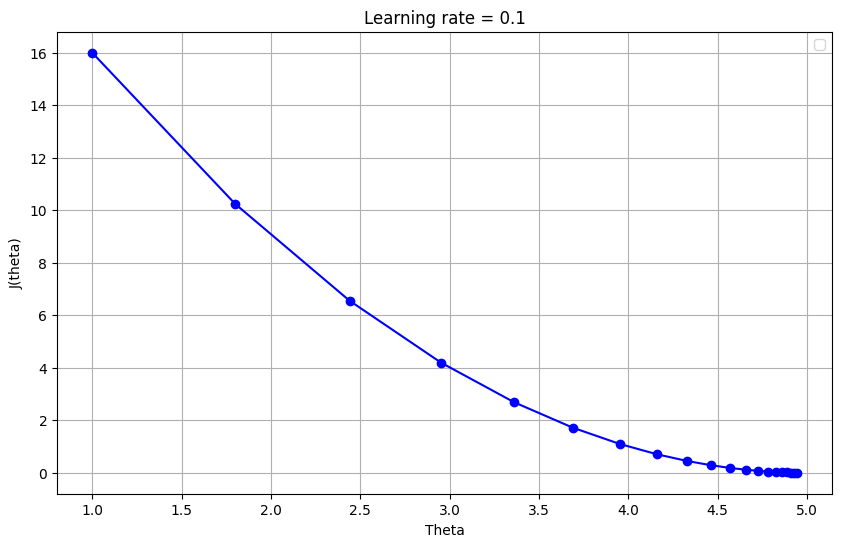

4.942353924769658
[1.0, 1.8, 2.4400000000000004, 2.9520000000000004, 3.3616, 3.68928, 3.9514240000000003, 4.1611392, 4.32891136, 4.4631290880000005, 4.570503270400001, 4.65640261632, 4.725122093056, 4.7800976744448, 4.82407813955584, 4.859262511644672, 4.8874100093157375, 4.90992800745259, 4.927942405962073, 4.942353924769658]


In [14]:
def gradient_descent(start_theta, learning_rate, iterations):
    theta = start_theta
    history = []

    for i in range(iterations):
        grad = 2 * (theta - 5)
        theta = theta - learning_rate * grad 
        history.append(theta)

    plt.figure(figsize=(10,6)) 
    plt.plot(history, [(t-5)**2 for t in history], 'bo-')
    plt.title(f"Learning rate = {learning_rate}")
    plt.xlabel("Theta")
    plt.ylabel("J(theta)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return theta, history

final_theta, history = gradient_descent(start_theta=0, learning_rate=0.1, iterations=20)

print(final_theta)
print(history)

### Задача 5. Влияние learning rate
Для функции из задачи 4:


1. Запустить градиентный спуск с η=0.01, 0.1, 1.0

2. Сравнить скорость сходимости

3. Сделать вывод


C:\Users\jekim\AppData\Local\Temp\ipykernel_14484\1647614543.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


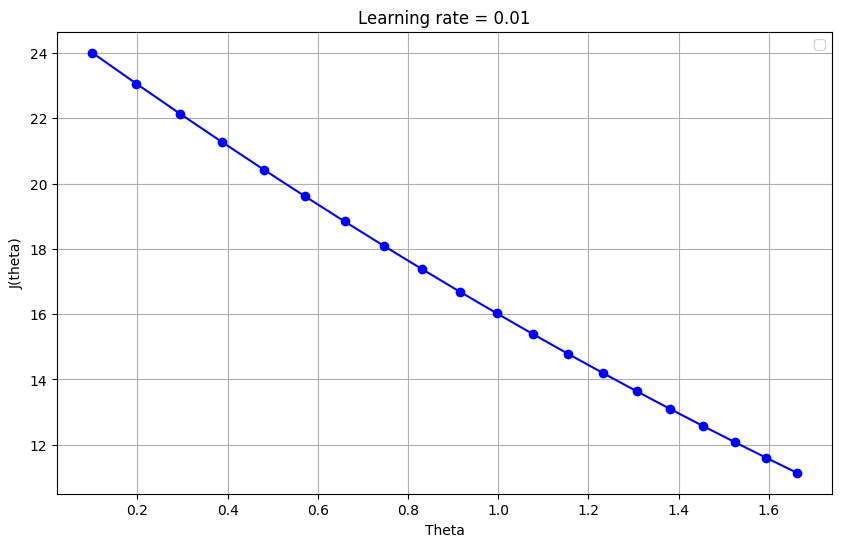

4.942353924769658
[0.1, 0.198, 0.29404, 0.38815920000000004, 0.48039601600000004, 0.57078809568, 0.6593723337664, 0.746184887091072, 0.8312611893492505, 0.9146359655622656, 0.9963432462510202, 1.0764163813259997, 1.1548880536994797, 1.23179029262549, 1.3071544867729803, 1.3810113970375206, 1.4533911690967702, 1.5243233457148349, 1.5938368788005381, 1.6619601412245273]


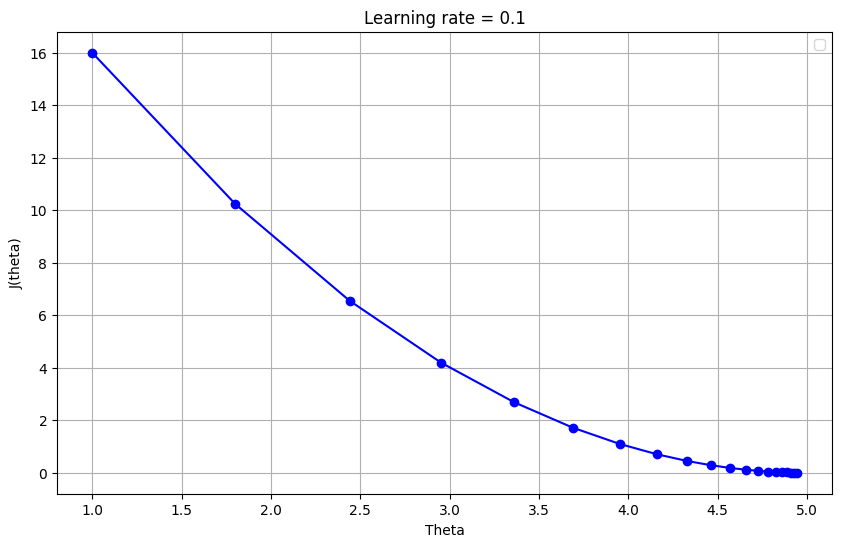

4.942353924769658
[1.0, 1.8, 2.4400000000000004, 2.9520000000000004, 3.3616, 3.68928, 3.9514240000000003, 4.1611392, 4.32891136, 4.4631290880000005, 4.570503270400001, 4.65640261632, 4.725122093056, 4.7800976744448, 4.82407813955584, 4.859262511644672, 4.8874100093157375, 4.90992800745259, 4.927942405962073, 4.942353924769658]


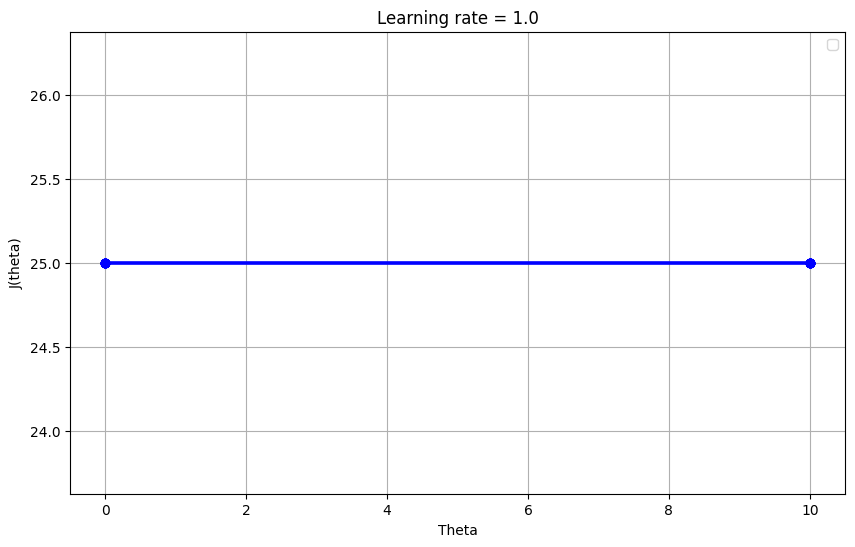

4.942353924769658
[10.0, 0.0, 10.0, 0.0, 10.0, 0.0, 10.0, 0.0, 10.0, 0.0, 10.0, 0.0, 10.0, 0.0, 10.0, 0.0, 10.0, 0.0, 10.0, 0.0]


In [ ]:
learning_rate_list = [0.01, 0.1, 1.0]
    
for i in learning_rate_list:
    finally_theta, history = gradient_descent(start_theta=0, learning_rate=i, iterations=20)

    print(final_theta)
    print(history)

### Задача 6. Градиентный спуск (2D)
**J(x,y)=x^2+y^2**

Требуется:

- Найти градиент

- Реализовать градиентный спуск

- Найти минимум, начиная с точки (3, –4)


In [30]:
def gradient_descent_2d(start_theta, learning_rate, iterations):
    x, y = start_theta
    history = []

    for i in range(iterations):
        grad_x = 2 * x
        grad_y = 2 * y 

        x = x - learning_rate * grad_x 
        y = y - learning_rate * grad_y 

        history.append([x, y])

    return [x,y], history

thethas, history = gradient_descent_2d(start_theta=[3, -4], learning_rate=0.1, iterations=20)

print(thethas)
print(history)

[0.03458764513820541, -0.04611686018427388]
[[2.4, -3.2], [1.92, -2.56], [1.536, -2.048], [1.2288000000000001, -1.6384], [0.9830400000000001, -1.31072], [0.7864320000000001, -1.0485760000000002], [0.6291456000000001, -0.8388608000000002], [0.5033164800000001, -0.6710886400000001], [0.40265318400000005, -0.5368709120000001], [0.32212254720000005, -0.4294967296000001], [0.25769803776000005, -0.3435973836800001], [0.20615843020800004, -0.27487790694400005], [0.16492674416640002, -0.21990232555520003], [0.13194139533312002, -0.17592186044416003], [0.10555311626649602, -0.140737488355328], [0.08444249301319681, -0.11258999068426241], [0.06755399441055746, -0.09007199254740993], [0.05404319552844596, -0.07205759403792794], [0.04323455642275677, -0.057646075230342354], [0.03458764513820541, -0.04611686018427388]]


In [34]:
import plotly.graph_objects as go
import numpy as np

def plot_interactive_3d(history):
    # 1. Создаем сетку для поверхности
    x_range = np.linspace(-5, 5, 100)
    y_range = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = X**2 + Y**2

    # 2. Извлекаем путь спуска
    hist_x = np.array([p[0] for p in history])
    hist_y = np.array([p[1] for p in history])
    hist_z = hist_x**2 + hist_y**2

    fig = go.Figure()

    # Добавляем поверхность чаши
    fig.add_trace(go.Surface(x=x_range, y=y_range, z=Z, colorscale='Viridis', opacity=0.7))

    # Добавляем линию пути спуска
    fig.add_trace(go.Scatter3d(x=hist_x, y=hist_y, z=hist_z,
                               mode='lines+markers',
                               line=dict(color='red', width=4),
                               marker=dict(size=4, color='white'),
                               name='Путь спуска'))

    fig.update_layout(title='Интерактивный 3D Градиентный спуск',
                      scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='J(x,y)'),
                      width=800, height=800)
    
    fig.show()

plot_interactive_3d(history)

## 🟠 Уровень 3 — Шығын функциялары

### Задача 7. Mean Squared Error
**Даны:
y = [2, 4, 6]
y_pred = [2.5, 3.5, 5.0]**

*Требуется:*
1. Вычислить MSE вручную
2. Реализовать MSE в Python
3. Сравнить результаты


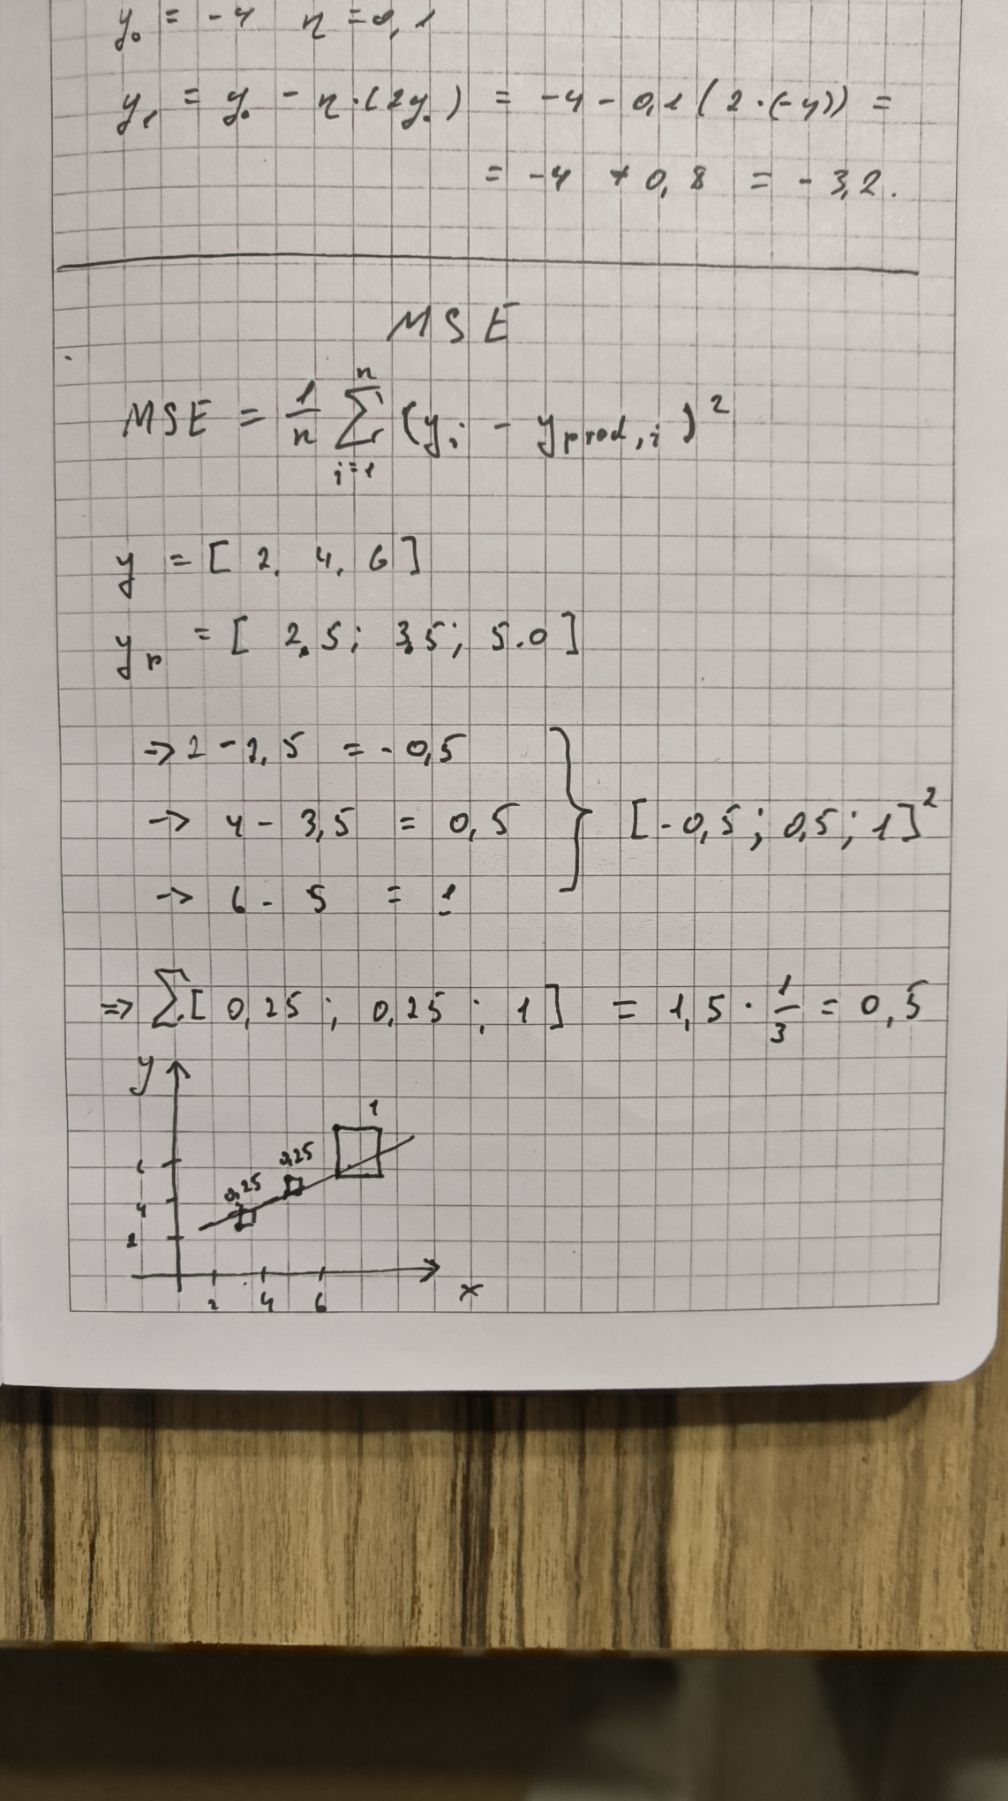

In [ ]:
def mse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    mse = np.mean((y_true - y_pred)**2)

    return mse 


y = [2, 4, 6]
y_pred = [2.5, 3.5, 5.0]

mse(y, y_pred)

np.float64(0.5)

### Задача 8. Cross-Entropy Loss
**Даны:**

y = [1, 0, 1, 1]

y_pred = [0.9, 0.2, 0.7, 0.4]

*Требуется:*
- Вычислить значение cross-entropy
- Объяснить, почему используется log
- Что произойдет, если y_pred=0?


In [36]:
y = [1, 0, 1, 1]
y_pred = [0.9, 0.2, 0.7, 0.4]

 В математике $\log(0)$ не определен, а предел функции $-\log(x)$ при $x \to 0$ стремится к $+\infty$

Если правильный ответ 1, а модель говорит «я уверен на 0.99», логарифм дает крошечный штраф.

Но если правильный ответ 1, а модель нагло заявляет «я уверен, что это 0.01», логарифм превращает эту ошибку в огромное число.

<img src="licensed-image.jpg" width="300">

Суть в том, что обычная разница (как в MSE) наказывает за ошибки «линейно». А логарифм наказывает экспоненциально за самоуверенность в неправильном ответе. Это заставляет модель учиться намного быстрее, когда она сильно ошибается.

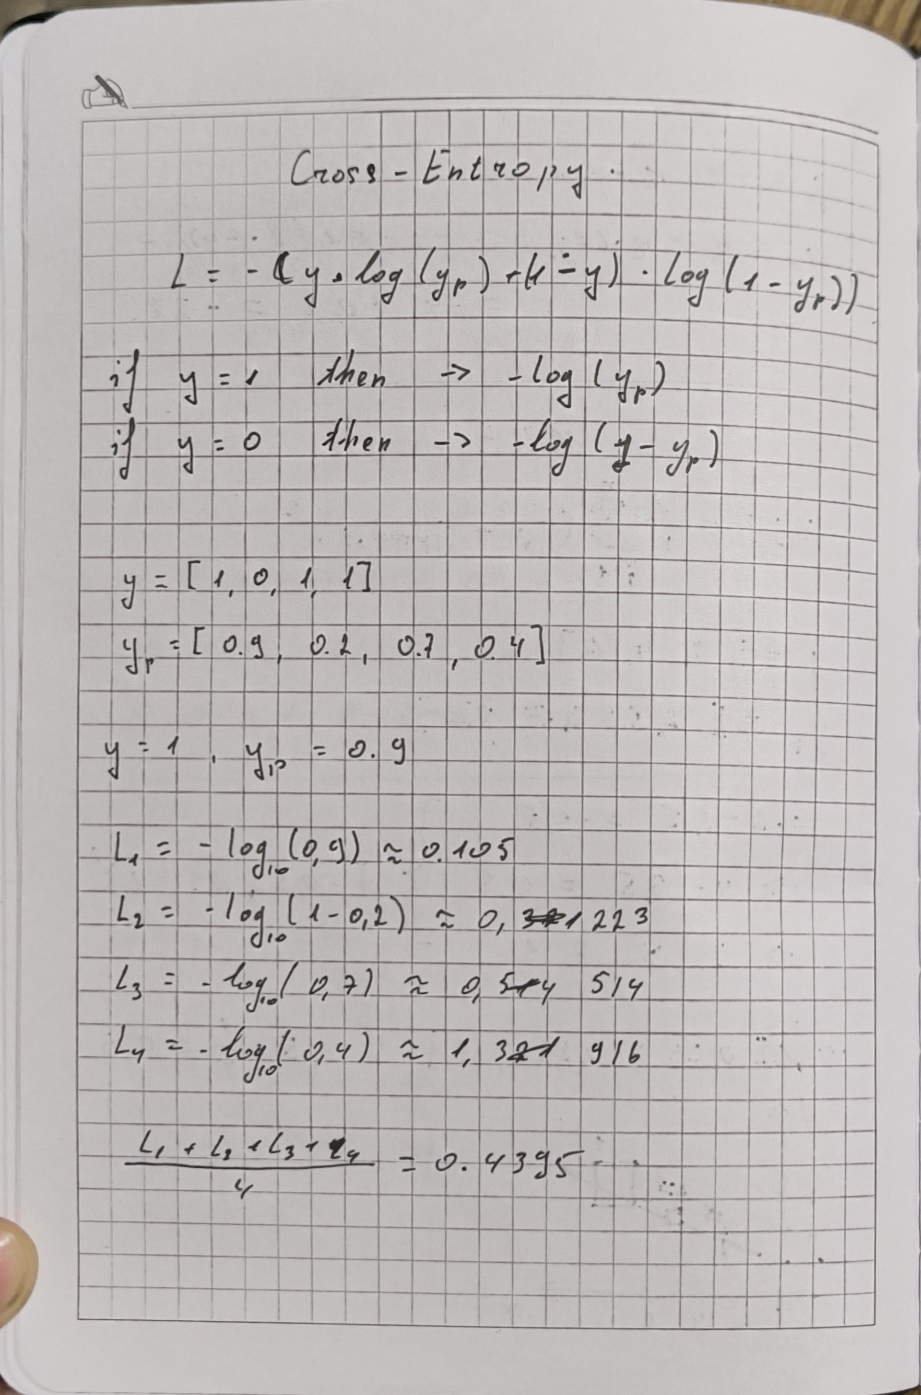
<!-- 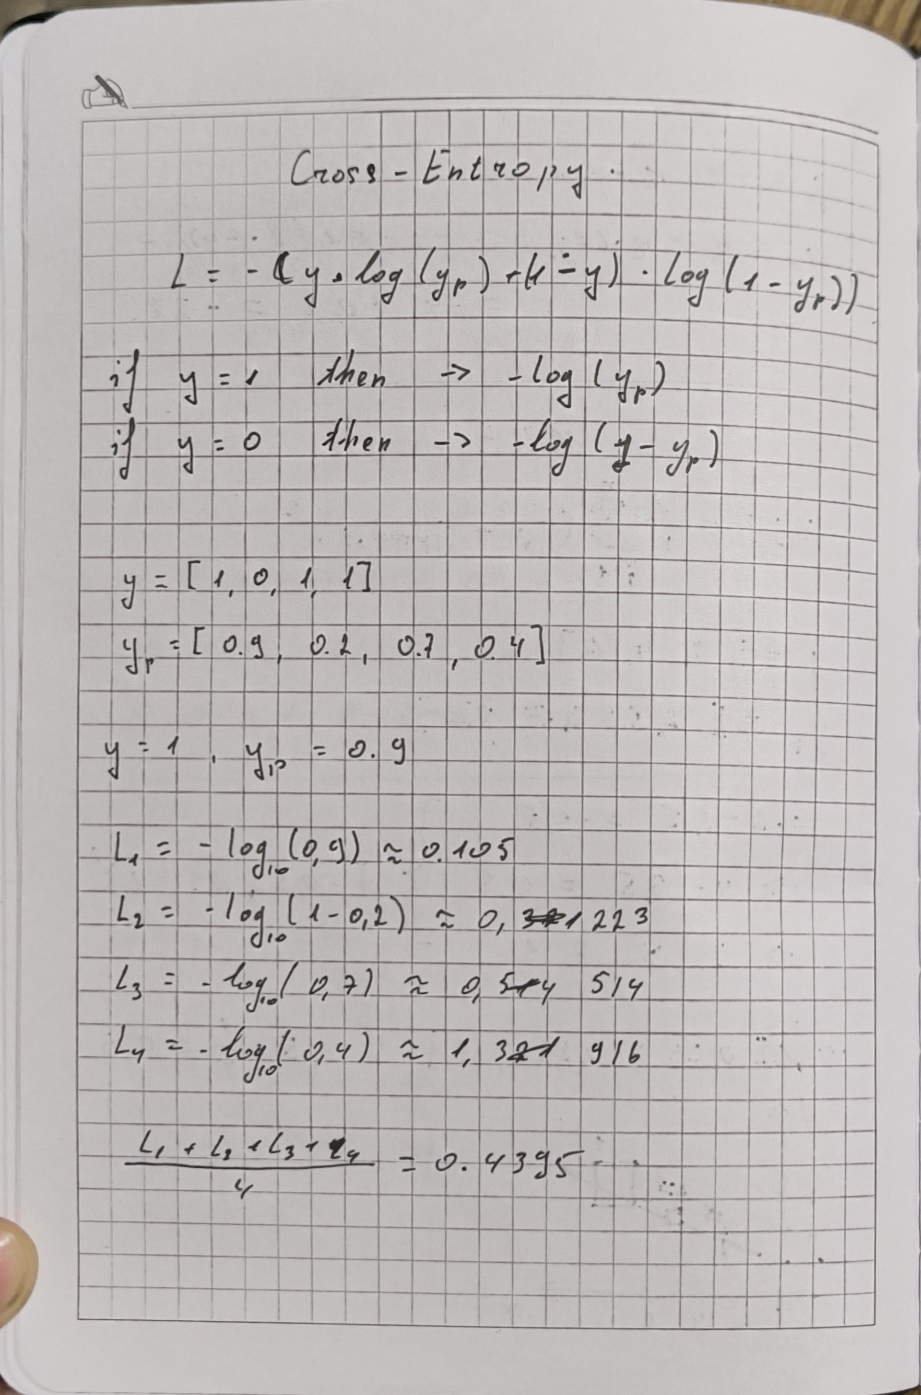 -->

In [37]:
def cross_entropy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    epsilon = 1e-15 
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss 

cross_entropy(y, y_pred)

np.float64(0.4003674356962309)

### Задача 9. Hinge Loss
**Даны:**

y = [1, -1, 1]

y_pred = [0.3, -0.2, 1.5]

**Требуется:**

Вычислить hinge loss

Какие объекты классифицированы правильно?

Что означает margin = 1?

$$L = \max(0, 1 - y \cdot y_{pred})$$

In [4]:
y = [1, -1, 1]
y_pred = [0.3, -0.2, 1.5]

from sklearn.metrics import hinge_loss 
import numpy as np 

loss = hinge_loss(y, y_pred) 

def hinge_loss_my(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    loss = np.maximum(0, 1 - y_true * y_pred)

    return np.mean(loss)

loss_my = hinge_loss_my(y, y_pred)

print("Loss: ", loss)
print("MY Loss: ", loss_my)

Loss:  0.5
MY Loss:  0.5


## 🔵 Уровень 4 — Регуляризация


### Задача 10. L1 vs L2
**Дан вектор параметров:**

 - θ=[2.0,−0.5,0.1]

**Требуется:**

Вычислить L1 и L2 штрафы при λ=0.1

Объяснить, какая регуляризация приведет к sparsity

В каких моделях чаще используется L1?


L1 = Lasso 
L2 = Ridge

In [18]:
x = [2.0, -0.5, 0.1]
alpha = 0.1 

def l1(theta, alpha):
    theta_arr = np.array(theta)
    l1 = alpha * np.sum(np.abs(theta_arr))
    return l1

def l2(theta, alpha):
    theta_arr = np.array(theta)
    l2 = alpha * np.sum(np.square(theta_arr))
    return l2

print('L1: ', l1(x, alpha))
print('L2: ', l2(x, alpha))

L1:  0.26
L2:  0.426
